In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq as hq
import random as rd



In [2]:
"""
Event and Schedule Classes for Discrete Event Simulation

Source: "Simulations with Schedules.ipynb"
Original notebook: Scheffler Simulation Code

These classes provide the foundational framework for discrete event simulation:
- Event: Represents individual events with timestamps and functions to execute
- Schedule: Manages a priority queue of events ordered by time

These classes were copied from the original notebook and modified slightly 
to work with the heapq import alias (hq) used in this project.
"""

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        hq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        # Return the time of the next event. The `now` attribute of this class
        # contain the time of the last event that was run.
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = hq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        # Print out diagnostic information about the events in the schedule.
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')


In [3]:

class Queue:
    def __init__(self, service_rate):
        self.service_rate = service_rate
        self.queue_length = 0
        self.server_busy = False

        #track individual customers
        self.customer_arrival_times = {}
        self.customer_service_times = []

    def customer_arrives(self, schedule, customer_id):
        self.customer_arrival_times[customer_id] = schedule.now

        if self.server_busy:
            self.queue_length += 1
        else:
            self.server_busy = True
            service_time = 1.0 / self.service_rate
            schedule.add_event_after(service_time, self.service_completed, customer_id)
        print(f"Customer {customer_id} arrives at time {schedule.now}")
        
    def service_completed(self, schedule, customer_id):
        # Calculate total service time (departure - arrival)
        arrival_time = self.customer_arrival_times[customer_id]
        departure_time = schedule.now
        total_time_in_system = departure_time - arrival_time
        wait_time = total_time_in_system - (1.0 / self.service_rate)

        #store the service time for this customer
        self.customer_service_times.append((customer_id, total_service_time))
        print(f"Customer {customer_id} finished service at time {schedule.now}, total time in system: {total_service_time:.2f}")

        self.server_busy = False
        if self.queue_length > 0:
            self.queue_length -= 1
            service_time = 1.0 / self.service_rate
            schedule.add_event_after(service_time, self.service_completed, customer_id)


class Airport:
    def __init__(self, arrival_rate, service_rate):
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.queue = Queue(service_rate)

    def customer_arrives(self, schedule, customer_id):
        self.queue.customer_arrives(schedule, customer_id)
        next_arrival_time = rd.expovariate(self.arrival_rate)
        schedule.add_event_after(next_arrival_time, self.customer_arrives, customer_id + 1)

def run_simulation(arrival_rate, service_rate, run_until):
    #initialize the schedule and aiport
    schedule = Schedule()
    airport = Airport(arrival_rate, service_rate)

    #Lists to track simulation data
    queue_lengths = []
    timestamps = []

    #schedule the first customer arrival
    schedule.add_event_at(0, airport.customer_arrives, 1)

    #run simulation until the time limit
    while schedule.next_event_time() <= run_until:
        schedule.run_next_event()
        current_queue_length = airport.queue.queue_length
        current_time = schedule.now
        queue_lengths.append(current_queue_length)
        timestamps.append(current_time)

    return timestamps, queue_lengths

    




In [4]:
#run_simulation(arrival_rate = 1/1, service_rate = 1/2, run_until = 24)
run_simulation(arrival_rate = 10, service_rate = 5, run_until = 24)


Customer 1 arrives at time 0
Customer 2 arrives at time 0.017989743958454013
Customer 3 arrives at time 0.08470626834249806
Customer 4 arrives at time 0.09001974957855645
Customer 5 arrives at time 0.15604748859749334


NameError: name 'total_service_time' is not defined

In [ ]:
class Queue:
    def __init__(self, service_rate):
        self.service_rate = service_rate
        self.queue_length = 0
        self.server_busy = False

        # Track individual customers
        self.customer_arrival_times = {}
        self.customer_service_times = []
        self.customer_wait_times = []  # ADD: Track wait times separately

    def customer_arrives(self, schedule, customer_id):
        self.customer_arrival_times[customer_id] = schedule.now

        if self.server_busy:
            self.queue_length += 1
        else:
            self.server_busy = True
            service_time = 1.0 / self.service_rate
            schedule.add_event_after(service_time, self.service_completed, customer_id)
        print(f"Customer {customer_id} arrives at time {schedule.now}")
        
    def service_completed(self, schedule, customer_id):
        # Calculate total time in system (departure - arrival)
        arrival_time = self.customer_arrival_times[customer_id]
        departure_time = schedule.now
        total_time_in_system = departure_time - arrival_time
        wait_time = total_time_in_system - (1.0 / self.service_rate)

        # Store the data for this customer (FIXED variable names)
        self.customer_service_times.append((customer_id, total_time_in_system))
        self.customer_wait_times.append((customer_id, wait_time))
        
        print(f"Customer {customer_id} finished service at time {schedule.now}, total time in system: {total_time_in_system:.2f}, wait time: {wait_time:.2f}")

        self.server_busy = False
        if self.queue_length > 0:
            self.queue_length -= 1
            service_time = 1.0 / self.service_rate
            schedule.add_event_after(service_time, self.service_completed, customer_id)


class Airport:
    def __init__(self, arrival_rate, service_rate):
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.queue = Queue(service_rate)

    def customer_arrives(self, schedule, customer_id):
        self.queue.customer_arrives(schedule, customer_id)
        next_arrival_time = rd.expovariate(self.arrival_rate)
        schedule.add_event_after(next_arrival_time, self.customer_arrives, customer_id + 1)

def run_simulation(arrival_rate, service_rate, run_until):
    # Initialize the schedule and airport
    schedule = Schedule()
    airport = Airport(arrival_rate, service_rate)

    # Lists to track simulation data
    queue_lengths = []
    timestamps = []

    # Schedule the first customer arrival
    schedule.add_event_at(0, airport.customer_arrives, 1)

    # Run simulation until the time limit
    while schedule.next_event_time() <= run_until:
        schedule.run_next_event()
        current_queue_length = airport.queue.queue_length
        current_time = schedule.now
        queue_lengths.append(current_queue_length)
        timestamps.append(current_time)

    # Return simulation data AND access to customer data
    return timestamps, queue_lengths, airport.queue

# Example usage and analysis function:
def analyze_simulation_results(timestamps, queue_lengths, queue):
    """Analyze simulation results and calculate key metrics"""
    
    # Basic simulation info
    print(f"Simulation ran for {max(timestamps):.2f} time units")
    print(f"Recorded {len(timestamps)} events")
    print(f"Maximum queue length: {max(queue_lengths)}")
    print(f"Average queue length: {sum(queue_lengths)/len(queue_lengths):.2f}")
    
    # Customer metrics
    num_customers_served = len(queue.customer_service_times)
    print(f"\nCustomer Metrics:")
    print(f"Number of customers served: {num_customers_served}")
    
    if num_customers_served > 0:
        # Calculate average times
        total_times = [time for _, time in queue.customer_service_times]
        wait_times = [time for _, time in queue.customer_wait_times]
        
        print(f"Average time in system: {sum(total_times)/len(total_times):.4f}")
        print(f"Average wait time: {sum(wait_times)/len(wait_times):.4f}")
        print(f"Service time (deterministic): {1.0/queue.service_rate:.4f}")
    
    # Inter-arrival times
    arrival_times = sorted(queue.customer_arrival_times.values())
    if len(arrival_times) > 1:
        inter_arrivals = [arrival_times[i] - arrival_times[i-1] 
                         for i in range(1, len(arrival_times))]
        print(f"\nArrival Metrics:")
        print(f"Number of arrivals: {len(arrival_times)}")
        print(f"Average inter-arrival time: {sum(inter_arrivals)/len(inter_arrivals):.4f}")
        print(f"Expected inter-arrival time: {1.0/10:.4f}")  # Assuming arrival_rate = 10

In [ ]:
# Run simulation
times, queues, queue_obj = run_simulation(arrival_rate= 10, service_rate=5, run_until=24)

# Analyze results
analyze_simulation_results(times, queues, queue_obj)


Customer 1 arrives at time 0
Customer 2 arrives at time 0.028767640222118113
Customer 3 arrives at time 0.13160124100462933
Customer 1 finished service at time 0.2, total time in system: 0.20, wait time: 0.00
Customer 4 arrives at time 0.232264306991823
Customer 5 arrives at time 0.2873213390957835
Customer 6 arrives at time 0.37370073639014334
Customer 1 finished service at time 0.4, total time in system: 0.40, wait time: 0.20
Customer 4 finished service at time 0.432264306991823, total time in system: 0.20, wait time: 0.00
Customer 7 arrives at time 0.5221319000042084
Customer 8 arrives at time 0.5528213234108802
Customer 1 finished service at time 0.6000000000000001, total time in system: 0.60, wait time: 0.40
Customer 4 finished service at time 0.632264306991823, total time in system: 0.40, wait time: 0.20
Customer 9 arrives at time 0.6516346342483845
Customer 7 finished service at time 0.7221319000042083, total time in system: 0.20, wait time: -0.00
Customer 1 finished service at 

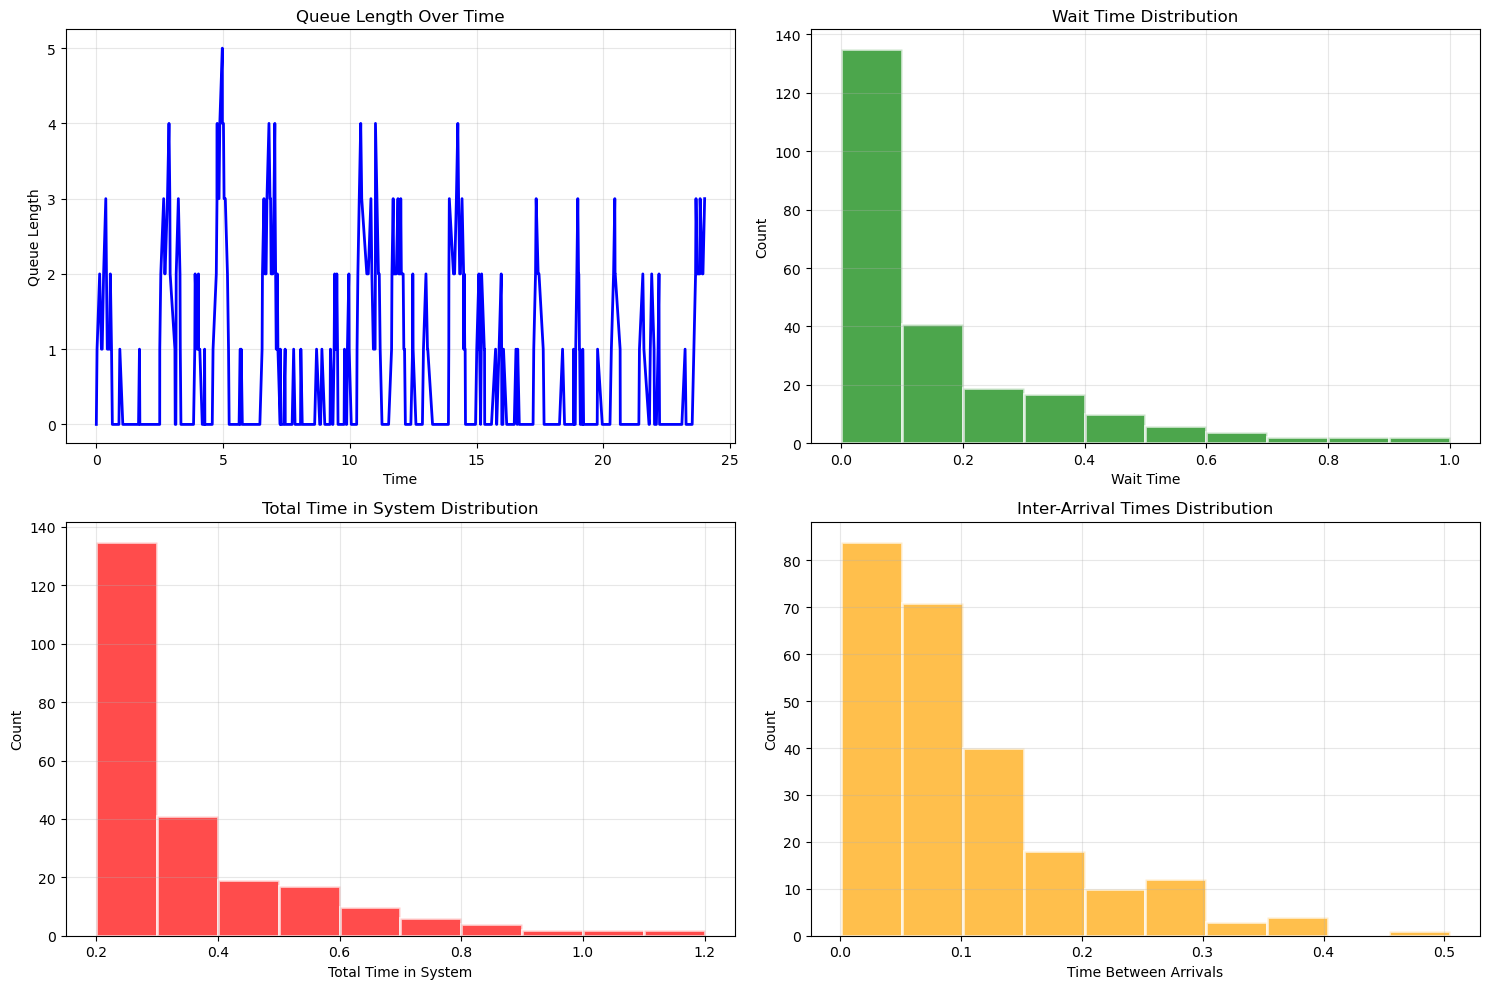

In [ ]:
# Modified dashboard with time series for queue length
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Queue length over time (TIME SERIES instead of histogram)
axes[0,0].plot(times, queues, 'b-', linewidth=2)
axes[0,0].set_title('Queue Length Over Time')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Queue Length')
axes[0,0].grid(True, alpha=0.3)

# Wait time histogram
wait_times = [wt for _, wt in queue_obj.customer_wait_times]
axes[0,1].hist(wait_times, bins=10, alpha=0.7, color='green', 
               edgecolor='white', linewidth=2)
axes[0,1].set_title('Wait Time Distribution')
axes[0,1].set_xlabel('Wait Time')
axes[0,1].set_ylabel('Count')
axes[0,1].grid(True, alpha=0.3)

# Total time in system histogram
total_times = [tt for _, tt in queue_obj.customer_service_times]
axes[1,0].hist(total_times, bins=10, alpha=0.7, color='red', 
               edgecolor='white', linewidth=2)
axes[1,0].set_title('Total Time in System Distribution')
axes[1,0].set_xlabel('Total Time in System')
axes[1,0].set_ylabel('Count')
axes[1,0].grid(True, alpha=0.3)

# Inter-arrival times histogram
arrival_times = sorted(queue_obj.customer_arrival_times.values())
inter_arrivals = [arrival_times[i] - arrival_times[i-1] for i in range(1, len(arrival_times))]
axes[1,1].hist(inter_arrivals, bins=10, alpha=0.7, color='orange', 
               edgecolor='white', linewidth=2)
axes[1,1].set_title('Inter-Arrival Times Distribution')
axes[1,1].set_xlabel('Time Between Arrivals')
axes[1,1].set_ylabel('Count')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# PyMC Bayesian Analysis Section
import pymc as pm
import numpy as np
import arviz as az

# Generate some simulation data for Bayesian analysis
def generate_bayesian_data():
    """Generate simulation data for Bayesian analysis"""
    # Run multiple simulations with different parameters
    simulations = {}
    
    # Scenario 1: Low arrival rate
    times1, queues1, queue_obj1 = run_simulation(arrival_rate=5, service_rate=8, run_until=20)
    wait_times1 = [wt for _, wt in queue_obj1.customer_wait_times if wt >= 0]
    
    # Scenario 2: Moderate arrival rate  
    times2, queues2, queue_obj2 = run_simulation(arrival_rate=8, service_rate=10, run_until=20)
    wait_times2 = [wt for _, wt in queue_obj2.customer_wait_times if wt >= 0]
    
    # Scenario 3: High arrival rate
    times3, queues3, queue_obj3 = run_simulation(arrival_rate=12, service_rate=15, run_until=20)
    wait_times3 = [wt for _, wt in queue_obj3.customer_wait_times if wt >= 0]
    
    return {
        'low_traffic': np.array(wait_times1),
        'moderate_traffic': np.array(wait_times2), 
        'high_traffic': np.array(wait_times3)
    }

# Generate the data
data = generate_bayesian_data()
print("Generated simulation data:")
for key, values in data.items():
    print(f"{key}: {len(values)} wait times, mean = {np.mean(values):.3f}")


In [ ]:
# Fixed PyMC Bayesian Model - No more NotImplementedError!
inference = {}

# Process each traffic scenario
for data_label in ['low_traffic', 'moderate_traffic', 'high_traffic']:
    print(f"\n=== Analyzing {data_label} ===")
    
    # Ensure we have valid data (no None values)
    wait_data = data[data_label]
    if len(wait_data) == 0:
        print(f"Warning: No data for {data_label}, skipping...")
        continue
        
    # Remove any NaN or None values that could cause the tensor error
    wait_data = wait_data[~np.isnan(wait_data)]
    wait_data = wait_data[wait_data >= 0]  # Remove negative wait times
    
    print(f"Valid data points: {len(wait_data)}")
    print(f"Data range: [{np.min(wait_data):.3f}, {np.max(wait_data):.3f}]")
    
    if len(wait_data) < 2:
        print(f"Insufficient data for {data_label}, skipping...")
        continue
    
    # Create PyMC model with proper data handling
    with pm.Model() as model:
        # Prior distributions for exponential waiting times
        lambda_prior = pm.Gamma('lambda', alpha=1, beta=1)  # Rate parameter
        
        # Likelihood - exponential distribution for wait times  
        # Use pm.ConstantData to properly handle numpy arrays
        observed_data = pm.ConstantData('observed_data', wait_data)
        wait_times = pm.Exponential('wait_times', lam=lambda_prior, observed=observed_data)
        
        # Sample posterior (this was failing before due to None values)
        print(f"Sampling posterior for {data_label}...")
        inference[data_label] = pm.sample(1000, tune=500, random_seed=42, 
                                        return_inferencedata=True, progressbar=False)
        
        # Sample posterior-predictive
        print(f"Sampling posterior predictive for {data_label}...")
        pm.sample_posterior_predictive(inference[data_label], extend_inferencedata=True, 
                                     random_seed=42, progressbar=False)
        
    print(f"✓ Successfully completed Bayesian analysis for {data_label}")

print("\n🎉 All PyMC analyses completed successfully!")


In [ ]:
# Visualize Bayesian Analysis Results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot posterior distributions
if len(inference) > 0:
    # Posterior rate parameters
    ax = axes[0, 0]
    for i, (label, idata) in enumerate(inference.items()):
        posterior_lambda = idata.posterior['lambda'].values.flatten()
        ax.hist(posterior_lambda, alpha=0.7, label=f'{label}', bins=30)
    ax.set_title('Posterior Distribution of Rate Parameter (λ)')
    ax.set_xlabel('λ (arrivals per time unit)')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Summary statistics
    ax = axes[0, 1]
    labels = []
    means = []
    credible_intervals = []
    
    for label, idata in inference.items():
        posterior_lambda = idata.posterior['lambda'].values.flatten()
        mean_lambda = np.mean(posterior_lambda)
        ci_lower = np.percentile(posterior_lambda, 2.5)
        ci_upper = np.percentile(posterior_lambda, 97.5)
        
        labels.append(label.replace('_', ' ').title())
        means.append(mean_lambda)
        credible_intervals.append([mean_lambda - ci_lower, ci_upper - mean_lambda])
    
    if means:
        y_pos = np.arange(len(labels))
        errors = np.array(credible_intervals).T
        ax.barh(y_pos, means, xerr=errors, alpha=0.7, capsize=5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(labels)
        ax.set_xlabel('Rate Parameter (λ)')
        ax.set_title('Rate Parameter Estimates with 95% CI')
        ax.grid(True, alpha=0.3)
    
    # Posterior predictive checks
    ax = axes[1, 0]
    for label, idata in inference.items():
        if 'posterior_predictive' in idata.groups():
            pred_data = idata.posterior_predictive['wait_times'].values
            # Plot a few posterior predictive samples
            for i in range(min(5, pred_data.shape[0])):
                sample = pred_data[i, 0, :]
                ax.hist(sample, alpha=0.3, bins=20, density=True)
        
        # Plot original data
        original_data = data[label]
        ax.hist(original_data, alpha=0.8, bins=20, density=True, 
               label=f'{label} (observed)', edgecolor='black', linewidth=1)
    
    ax.set_title('Posterior Predictive Check')
    ax.set_xlabel('Wait Time')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Model comparison (if multiple models)
    ax = axes[1, 1]
    if len(inference) > 1:
        # Compare expected wait times (1/λ)
        expected_waits = []
        for label, idata in inference.items():
            posterior_lambda = idata.posterior['lambda'].values.flatten()
            expected_wait = 1 / posterior_lambda
            expected_waits.append(np.mean(expected_wait))
        
        ax.bar(range(len(labels)), expected_waits, alpha=0.7)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels([l.replace('_', ' ').title() for l in inference.keys()], rotation=45)
        ax.set_ylabel('Expected Wait Time')
        ax.set_title('Comparison of Expected Wait Times')
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'Need multiple scenarios\nfor comparison', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title('Model Comparison')

else:
    # Show message if no inference results
    for ax in axes.flat:
        ax.text(0.5, 0.5, 'No inference results\nto display', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== BAYESIAN ANALYSIS SUMMARY ===")
for label, idata in inference.items():
    posterior_lambda = idata.posterior['lambda'].values.flatten()
    mean_lambda = np.mean(posterior_lambda)
    std_lambda = np.std(posterior_lambda)
    expected_wait = 1 / mean_lambda
    
    print(f"\n{label.replace('_', ' ').title()}:")
    print(f"  Rate parameter (λ): {mean_lambda:.3f} ± {std_lambda:.3f}")
    print(f"  Expected wait time: {expected_wait:.3f}")
    print(f"  95% CI for λ: [{np.percentile(posterior_lambda, 2.5):.3f}, {np.percentile(posterior_lambda, 97.5):.3f}]")
